In [1]:
#import libraries and functions to load the data
from digits import get_mnist
from matplotlib import pyplot as plt
import numpy as np
import ast
import sys
import numpy.testing as npt
import pytest
import random
from IPython.core.debugger import set_trace

trX.shape:  (784, 60000)
trY.shape:  (1, 60000)
tsX.shape:  (784, 10000)
tsY.shape:  (1, 10000)
Train max: value = 1.0, Train min: value = -1.0
Test max: value = 1.0, Test min: value = -1.0
Unique labels in train:  [0 1 2 3 4 5 6 7 8 9]
Unique labels in test:  [0 1 2 3 4 5 6 7 8 9]

Displaying a few samples
labels
[[5 0 4 1 9 2 1 3 1 4]
 [3 5 3 6 1 7 2 8 6 9]
 [4 0 9 1 1 2 4 3 2 7]
 [3 8 6 9 0 5 6 0 7 6]
 [1 8 7 9 3 9 8 5 9 3]
 [7 2 1 0 4 1 4 9 5 9]
 [0 6 9 0 1 5 9 7 3 4]
 [9 6 6 5 4 0 7 4 0 1]
 [3 1 3 4 7 2 7 1 2 1]
 [1 7 4 2 3 5 1 2 4 4]]


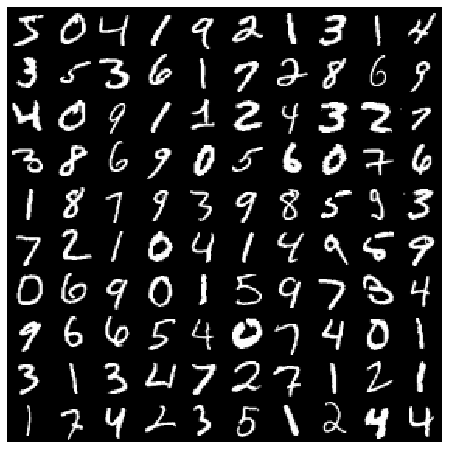

In [2]:
random.seed(1)
np.random.seed(1)
trX, trY, tsX, tsY = get_mnist()
# We need to reshape the data everytime to match the format (d,m), where d is dimensions (784) and m is number of samples
trX = trX.reshape(-1, 28*28).T
trY = trY.reshape(1, -1)
tsX = tsX.reshape(-1, 28*28).T
tsY = tsY.reshape(1, -1)
    
# Lets examine the data and see if it is normalized
print('trX.shape: ', trX.shape)
print('trY.shape: ', trY.shape)
print('tsX.shape: ', tsX.shape)
print('tsY.shape: ', tsY.shape)
print('Train max: value = {}, Train min: value = {}'.format(np.max(trX), np.min(trX)))
print('Test max: value = {}, Test min: value = {}'.format(np.max(tsX), np.min(tsX)))
print('Unique labels in train: ', np.unique(trY))
print('Unique labels in test: ', np.unique(tsY))

# Let's visualize a few samples and their labels from the train and test datasets.
print('\nDisplaying a few samples')
visx = np.concatenate((trX[:,:50],tsX[:,:50]), axis=1).reshape(28,28,10,10).transpose(2,0,3,1).reshape(28*10,-1)
visy = np.concatenate((trY[:,:50],tsY[:,:50]), axis=1).reshape(10,-1)
    
print('labels')
print(visy)
plt.figure(figsize = (8,8))
plt.axis('off')
plt.imshow(visx, cmap='gray');

In [3]:
def relu(Z):
    '''
    Computes relu activation of input Z
    
    Inputs: 
        Z: numpy.ndarray (n, m) which represent 'm' samples each of 'n' dimension
        
    Outputs: 
        A: where A = ReLU(Z) is a numpy.ndarray (n, m) representing 'm' samples each of 'n' dimension
        cache: a dictionary with {"Z", Z}
        
    '''
    cache = {}
    # your code here
    if type(Z) is list: 
        Z = np.asarray(Z)
        
    A = np.maximum(np.zeros((Z.shape)), Z)
    cache["Z"] = Z    

    
    return A, cache

In [4]:
def relu_der(dA, cache):
    '''
    Computes derivative of relu activation
    
    Inputs: 
        dA: derivative from the subsequent layer of dimension (n, m). 
            dA is multiplied elementwise with the gradient of ReLU
        cache: dictionary with {"Z", Z}, where Z was the input 
            to the activation layer during forward propagation
        
    Outputs: 
        dZ: the derivative of dimension (n,m). It is the elementwise 
            product of the derivative of ReLU and dA
        
    '''
    dZ = np.array(dA, copy=True)
    Z = cache["Z"]
    # your code here
    dRelu = np.where(Z <= 0, 0, 1) 
    dZ = np.multiply(dZ, dRelu)
    
    return dZ

In [5]:
def linear(Z):
    '''
    Computes linear activation of Z
    This function is implemented for completeness
        
    Inputs: 
        Z: numpy.ndarray (n, m) which represent 'm' samples each of 'n' dimension
        
    Outputs: 
        A: where A = Linear(Z) is a numpy.ndarray (n, m) representing 'm' samples each of 'n' dimension
        cache: a dictionary with {"Z", Z}   
    '''
    A = Z
    cache = {}
    cache["Z"] = Z
    return A, cache


def linear_der(dA, cache):
    '''
    Computes derivative of linear activation
    This function is implemented for completeness
    
    Inputs: 
        dA: derivative from the subsequent layer of dimension (n, m). 
            dA is multiplied elementwise with the gradient of Linear(.)
        cache: dictionary with {"Z", Z}, where Z was the input 
            to the activation layer during forward propagation
        
    Outputs: 
        dZ: the derivative of dimension (n,m). It is the elementwise 
            product of the derivative of Linear(.) and dA
    '''      
    dZ = np.array(dA, copy=True)
    return dZ

In [6]:
def softmax_cross_entropy_loss(Z, Y=np.array([])):
    '''
    Computes the softmax activation of the inputs Z
    Estimates the cross entropy loss

    Inputs: 
        Z: numpy.ndarray (n, m)
        Y: numpy.ndarray (1, m) of labels
            when y=[] loss is set to []
    
    Outputs:
        A: numpy.ndarray (n, m) of softmax activations
        cache: a dictionary to store the activations which will be used later to estimate derivatives
        loss: cost of prediction
    '''
    
    # your code here
    A = np.exp(Z)/ np.sum(np.exp(Z), axis=0, keepdims = True)
    if Y.size == 0:
        loss = 0.0
    else: 
        Y_oneHot = np.zeros((A.shape))
        Y_oneHot[Y.astype(int), np.arange(Y.shape[1])] = 1
        loss = -np.mean(np.sum(Y_oneHot * np.log(A), axis=0, keepdims=True))
        
        
    cache = {}
    cache["A"] = A
    return A, cache, loss

In [7]:
def softmax_cross_entropy_loss_der(Y, cache):
    '''
    Computes the derivative of the softmax activation and cross entropy loss

    Inputs: 
        Y: numpy.ndarray (1, m) of labels
        cache: a dictionary with cached activations A of size (n,m)

    Outputs:
        dZ: derivative dL/dZ - a numpy.ndarray of dimensions (n, m) 
    '''
    A = cache["A"]
    # your code here
    Y_oneHot = np.zeros((A.shape))
    Y_oneHot[Y.astype(int), np.arange(Y.shape[1])] = 1

    dZ = (A - Y_oneHot)/Y.shape[1]
    
    return dZ

In [8]:
def dropout(A, drop_prob, mode='train'):
        '''
        Using the 'inverted dropout' technique to implement dropout regularization.
        Inputs:
            A: Activation input before dropout is applied - shape is (n,m)
            drop_prob: dropout parameter. If drop_prob = 0.3, we drop 30% of the neuron activations
            mode: Dropout acts differently in training and testing mode. Hence, mode is a parameter which
                takes in only 2 values, 'train' or 'test'

        Outputs:
            A: Output of shape (n,m), with some values masked out and other values scaled to account for missing values
            cache: a tuple which stores the drop_prob, mode and mask for use in backward pass.
        '''
        # When there is no dropout return the same activation
        mask = None
        if drop_prob == 0:
            cache = (drop_prob, mode, mask)
            return A, cache
        
        # The prob_keep is the percentage of activations remaining after dropout
        # if drop_out = 0.3, then prob_keep = 0.7, i.e., 70% of the activations are retained
        prob_keep = 1-drop_prob
        
        # Note: instead of a binary mask implement a scaled mask, where mask is scaled by dividing it 
        # by the prob_keep for example, if we have input activations of size (3,4), then the mask is 
        # mask = (np.random.rand(3,4)<prob_keep)/prob_keep
        # We perform the scaling by prob_keep here so we don't have to do it specifically during backpropagation 
        # We then update A by multiplying it element wise with the mask
        
        if mode == 'train':
            # your code here
            mask = (np.random.rand(A.shape[0],A.shape[1]) < prob_keep)/prob_keep
            A = A *  mask
            
        elif mode != 'test':
            raise ValueError("Mode value not set correctly, set it to 'train' or 'test'")
        cache = (drop_prob, mode, mask)
        return A, cache

In [9]:
def dropout_der(dA_in, cache):
        '''
        Backward pass for the inverted dropout.
        Inputs: 
            dA_in: derivative from the upper layers of dimension (n,m).
            cache: tuple containing (drop_out, mode, mask), where drop_out is the probability of drop_out, 
                if drop_out=0, then the layer does not have any dropout,
                mode is either 'train' or 'test' and 
                mask is a matirx of size (n,m) where 0's indicate masked values
        Outputs:
            dA_out = derivative of the dropout layer of dimension (n,m)
        '''
        
        dA_out = None
        drop_out, mode, mask = cache
        # If there is no dropout return the same derivative from the previous layer
        if not drop_out:
            return dA_in
        
        # if mode is 'train' dA_out is dA_in multiplied element wise by mask
        # if mode is 'test' dA_out is same as dA_in
        # your code here
        if mode == 'train':
            dA_out = dA_in * mask
        else:
            dA_out = dA_in
            
        return dA_out

In [10]:
def batchnorm(A, beta, gamma):
    '''
    Batchnorm normalizes the input A to mean beta and standard deviation gamma
    
    Inputs: 
        A: Activation input after activation - shape is (n,m), m samples where each sample x is (n,1)
        beta: mean vector which will be the center of the data after batchnorm - shape is (n,1)
        gamma: standard deviation vector which will be scale of the data after batchnorm - shape (n,1)
        
    Outputs: 
        Anorm: Normalized version of input A - shape (n,m)
        cache: Dictionary of the elements that are necessary for backpropagation
    '''
    
    # When there is no batch norm for a layer, the beta and gamma will be empty arrays
    if beta.size == 0 or gamma.size == 0:
        cache = {}
        return A, cache
    # epsilon value used for scaling during normalization to avoid divide by zero. 
    # don't change this value - the test case will fail if you change this value
    epsilon = 1e-5
    # your code here
    '''
    # Calculating mean and variance
    mu = np.sum(A, axis = 1, keepdims = True)/A.shape[1]
    var = np.sum((A - mu)**2, axis = 1,keepdims = True)/A.shape[1]
    
    # Getting Normalized values of A (Zero mean and Unit variance)
    Ahat = (A - mu)/ np.sqrt(var + epsilon)

    # Transforming Normalized A (Ahat) to Anorm (with beta mean and gamma variance) 
    Anorm = (gamma * Ahat) + beta
    '''
    
    n, m = A.shape
    
    #step1: calculatemean
    mu = np.sum(A,axis=1, keepdims = True)/m
    
    #step2: subtract mean vector of every trainings example
    Amu = A - mu

    #step3: following the lower branch - calculation denominator
    sq = Amu ** 2

    #step4: calculate variance
    var = np.sum(sq, axis=1, keepdims = True)/m         ##################### np.nansum

    #step5: add epsilon for numerical stability, then sqrt
    sqrtvar = np.sqrt(var + epsilon)

    #step6: invert sqrtvar
    ivar = 1./sqrtvar

    #step7: execute normalization
    Ahat = Amu * ivar

    #step8: Nor the two transformation steps
    gammaA = gamma * Ahat

    #step9
    Anorm = gammaA + beta

    #store intermediate
    cache = (Ahat,gamma,Amu,ivar,sqrtvar,var,epsilon)    
    
    return Anorm, cache

In [11]:
def batchnorm_der(dA_in, cache):
    '''
    Derivative of the batchnorm
    Inputs: 
        dA_in: derivative from the upper layers of dimension (n,m).
        cache: Dictionary of the elements that are necessary for backpropagation
    Outputs:
        dA_out: derivative of the batchnorm layer of dimension (n,m)
        dbeta: derivative of beta - shape (n,1)
        dgamma: derivative of gamma - shape (n,1)
    '''
    # When the cache is empty, it indicates there was no batchnorm for the layer
    if not cache:
        dbeta = []
        dgamma = []
        return dA_in, dbeta, dgamma
    
    # your code here
    
    #unfold the variables stored in cache
    xhat,gamma,xmu,ivar,sqrtvar,var,eps = cache
    
    # get the dimensions of the input/output
    n, m = dA_in.shape
    
    #step9
    dbeta = np.sum(dA_in, axis=1, keepdims = True)
    dgammax = dA_in
    
    #step8
    dgamma = np.sum(dgammax * xhat, axis=1, keepdims = True)
    dxhat  = dgammax * gamma
    
    #step7
    divar = np.sum(dxhat*xmu, axis=1, keepdims = True)
    dxmu1 = dxhat * ivar

    #step6
    dsqrtvar = -1. /(sqrtvar**2) * divar

    #step5
    dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar

    #step4
    dsq = (np.ones((n,m)) * dvar)/m

    #step3
    dxmu2 = 2 * xmu * dsq

    #step2
    dx1 = (dxmu1 + dxmu2)
    dmu = -1 * np.sum(dxmu1+dxmu2, axis=1, keepdims = True)

    #step1
    dx2 = (np.ones((n,m)) * dmu)/m

    #step0
    dA_out = dx1 + dx2
    
    
    return dA_out, dbeta, dgamma

In [12]:
def initialize_network(net_dims, act_list, drop_prob_list):
    '''
    Initializes the parameters W's and b's of a multi-layer neural network
    Adds information about dropout and activations in each layer
    
    Inputs:
        net_dims: List containing the dimensions of the network. The values of the array represent the number of nodes in 
        each layer. For Example, if a Neural network contains 784 nodes in the input layer, 800 in the first hidden layer, 
        500 in the secound hidden layer and 10 in the output layer, then net_dims = [784,800,500,10]. 
        act_list: list of strings indicating the activation for a layer
        drop_prob_list: list of dropout probabilities for each layer 
    
    Outputs:
        parameters: dictionary of 
                    {"numLayers":..}
                    activations, {"act1":"..", "act2":"..", ...}
                    dropouts, {"dropout1": .. , "dropout2": .., ...}
                    network parameters, {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
            The weights are initialized using Kaiming He et al. Initialization
    '''
    net_dims_len = len(net_dims)
    parameters = {}
    parameters['numLayers'] = net_dims_len - 1;
    for l in range(net_dims_len-1):
        parameters["act"+str(l+1)] = act_list[l]
        parameters["dropout"+str(l+1)] = drop_prob_list[l]
        # Note: Use He et al. Initialization to initialize W and set bias to 0's
        # parameters["W"+str(l+1)] = 
        # parameters["b"+str(l+1)] =
        # your code here
        parameters["W"+str(l+1)] = np.random.randn(net_dims[l+1],net_dims[l])*(2./np.sqrt(net_dims[l]))
        parameters["b"+str(l+1)] = np.zeros((net_dims[l+1],1))

    return parameters

In [13]:
def initialize_velocity(parameters, apply_momentum=True):
    '''
    The function will add Adam momentum parameters, Velocity and Gradient-Squares 
    to the parameters for each of the W's and b's 
    
    Inputs: 
        parameters: dictionary containing, 
                    {"numLayers":..}
                    activations, {"act1":"..", "act2":"..", ...}
                    dropouts, {"dropout1": .. , "dropout2": .., ...}
                    network parameters, {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
                    Note: It is just one dictionary (parameters) with all these key value pairs, not multiple dictionaries
        apply_momentum: boolean on whether to apply momentum
        
    Outputs:
        parameters: dictionary that has been updated to include velocity and Gradient-Squares. It now contains,
                    {"numLayers":..}
                    activations, {"act1":"..", "act2":"..", ...}
                    dropouts, {"dropout1": .. , "dropout2": .., ...}
                    {"apply_momentum":..}
                    velocity parameters, {"VdW1":[..],"Vdb1":[..],"VdW2":[..],"Vdb2":[..],...}
                    Gradient-Squares parameters, {"GdW1":[..],"Gdb1":[..],"GdW2":[..],"Gdb2":[..],...}
                    Note: It is just one dictionary (parameters) with all these key value pairs, not multiple dictionaries
    '''
    
    L = parameters['numLayers'] 
    parameters['apply_momentum'] = apply_momentum
    
    # Initialize Velocity and the Gradient-Squares to zeros the same size as the corresponding parameters W's abd b's
    for l in range(L):
        if apply_momentum:
            # Hint: Velocity parameters are represented as VdW and Vdb
            #      Gradient-Squares are represented as GdW and Gdb
            # You can use np.zeros_like(.) to initilaize them 0's the same size as corresponding parameters W and b
            # parameters["VdW" + str(l+1)] = 
            # parameters["Vdb" + str(l+1)] =
            # parameters["GdW" + str(l+1)] =
            # parameters["Gdb" + str(l+1)] =
            # your code here
            parameters["VdW" + str(l+1)] = np.zeros_like(parameters["W"+str(l+1)])
            parameters["Vdb" + str(l+1)] = np.zeros_like(parameters["b"+str(l+1)])
            parameters["GdW" + str(l+1)] = np.zeros_like(parameters["W"+str(l+1)])
            parameters["Gdb" + str(l+1)] = np.zeros_like(parameters["b"+str(l+1)])    
    
    return parameters

In [14]:
def initialize_bnorm_params(parameters, bnorm_list, apply_momentum):
    '''
    The function will add batchnorm parameters beta's and gamma's and their corresponding
    Velocity and Gradient-Squares to the parameters dictionary
    
    Inputs: 
        parameters: dictionary that contains,
                    {"numLayers":..}
                    activations, {"act1":"..", "act2":"..", ...}
                    dropouts, {"dropout1": .. , "dropout2": .., ...}
                    {"apply_momentum":..}
                    velocity parameters, {"VdW1":[..],"Vdb1":[..],"VdW2":[..],"Vdb2":[..],...}
                    Gradient-Squares parameters, {"GdW1":[..],"Gdb1":[..],"GdW2":[..],"Gdb2":[..],...}
                    Note: It is just one dictionary (parameters) with all these key value pairs, not multiple dictionaries
        bnorm_list: binary list indicating if batchnorm should be implemented for a layer
        apply_momentum: boolean on whether to apply momentum
        
    Outputs:
        parameters: dictionary that has been updated to include batchnorm parameters, beta, gamma 
                    and their corresponding momentum parameters. It now contains,
                    {"numLayers":..}
                    activations, {"act1":"..", "act2":"..", ...}
                    dropouts, {"dropout1": .. , "dropout2": .., ...}
                    velocity parameters, {"VdW1":[..],"Vdb1":[..],"VdW2":[..],"Vdb2":[..],...}
                    Gradient-Squares parameters, {"GdW1":[..],"Gdb1":[..],"GdW2":[..],"Gdb2":[..],...}
                    {"bnorm_list":..}
                    batchnorm parameters, {"bnorm_beta1":[..],"bnorm_gamma1":[..],"bnorm_beta2":[..],"bnorm_gamma2":[..],...}
                    batchnorm velocity parameters, {"Vbnorm_beta1":[..],"Vbnorm_gamma1":[..],"Vbnorm_beta2":[..],"Vbnorm_gamma2":[..],...}
                    batchnorm Gradient-Square parameters, {"Gbnorm_beta1":[..],"Gbnorm_gamma1":[..],"Gbnorm_beta2":[..],"Gbnorm_gamma2":[..],...}
                    Note: It is just one dictionary (parameters) with all these key value pairs, not multiple dictionaries
    '''
    
    L = parameters['numLayers']
    parameters['bnorm_list'] = bnorm_list
    
    # Initialize batchnorm parameters for the hidden layers only. 
    # Each hidden layer will have a dictionary of parameters, beta and gamma based on the dimensions of the hidden layer. 
    for l in range(L):
        if bnorm_list[l]:
            n = parameters["W" + str(l+1)].shape[0]
            parameters['bnorm_beta'+str(l+1)] = np.random.randn(n,1)
            parameters['bnorm_gamma'+str(l+1)] = np.random.randn(n,1)
            if apply_momentum:
                parameters['Vbnorm_beta'+str(l+1)] = np.zeros((n,1))
                parameters['Gbnorm_beta'+str(l+1)] = np.zeros((n,1))
                parameters['Vbnorm_gamma'+str(l+1)] = np.zeros((n,1))
                parameters['Gbnorm_gamma'+str(l+1)] = np.zeros((n,1))
        else:
            parameters['bnorm_beta'+str(l+1)] = np.asarray([])
            parameters['Vbnorm_beta'+str(l+1)] = np.asarray([])
            parameters['Gbnorm_beta'+str(l+1)] = np.asarray([])
            parameters['bnorm_gamma'+str(l+1)] = np.asarray([])
            parameters['Vbnorm_gamma'+str(l+1)] = np.asarray([])
            parameters['Gbnorm_gamma'+str(l+1)] = np.asarray([])
    return parameters

In [15]:
def linear_forward(A_prev, W, b):
    '''
    Input A_prev propagates through the layer 
    Z = WA + b is the output of this layer. 

    Inputs: 
        A_prev: numpy.ndarray (n,m) the input to the layer
        W: numpy.ndarray (n_out, n) the weights of the layer
        b: numpy.ndarray (n_out, 1) the bias of the layer

    Outputs:
        Z: where Z = W.A_prev + b, where Z is the numpy.ndarray (n_out, m) dimensions
        cache: a dictionary containing the inputs A
    '''
    # your code here
    Z = np.dot(W, A_prev) + b
    #Z = np.where(np.isnan(W),0,W).dot(np.where(np.isnan(A_prev),0,A_prev))
    # assert(Z.shape == (W.shape[0], A_prev.shape[1]))

    cache = {}
    cache["A"] = A_prev
    return Z, cache

In [16]:
def layer_forward(A_prev, W, b, activation, drop_prob, bnorm_beta, bnorm_gamma, mode):
    '''
    Input A_prev propagates through the layer followed by activation, batchnorm and dropout

    Inputs: 
        A_prev: numpy.ndarray (n,m) the input to the layer
        W: numpy.ndarray (n_out, n) the weights of the layer
        b: numpy.ndarray (n_out, 1) the bias of the layer
        activation: is the string that specifies the activation function
        drop_prob: dropout parameter. If drop_prob = 0.3, we drop 30% of the neuron activations
        bnorm_beta: batchnorm beta 
        bnorm_gamma: batchnorm gamma
        mode: 'train' or 'test' Dropout acts differently in training and testing mode. Hence, mode is a parameter which
                takes in only 2 values, 'train' or 'test'

    Outputs:
        A: = g(Z), where Z = WA + b, where Z is the numpy.ndarray (n_out, m) dimensions
        g is the activation function
        cache: a dictionary containing the cache from the linear propagation, activation, bacthnorm and dropout
        to be used for derivative
    '''
    
    Z, lin_cache = linear_forward(A_prev, W, b)
    if activation == "relu":
        A, act_cache = relu(Z)
    elif activation == "linear":
        A, act_cache = linear(Z)
    
    A, bnorm_cache = batchnorm(A, bnorm_beta, bnorm_gamma)
    A, drop_cache = dropout(A, drop_prob, mode)
    cache = {}
    cache["lin_cache"] = lin_cache
    cache["act_cache"] = act_cache
    cache["bnorm_cache"] = bnorm_cache
    cache["drop_cache"] = drop_cache
    
    return A, cache

In [17]:
def multi_layer_forward(A0, parameters, mode):
    '''
    Forward propgation through the layers of the network

    Inputs: 
        A0: numpy.ndarray (n,m) with n features and m samples
        parameters: dictionary of network parameters {"W1":[..],"b1":[..],"W2":[..],"b2":[..]...}
        mode: 'train' or 'test' Dropout acts differently in training and testing mode. Hence, mode is a parameter which
                takes in only 2 values, 'train' or 'test' 
    
    Outputs:
        AL: numpy.ndarray (c,m)  - outputs of the last fully connected layer before softmax
            where c is number of categories and m is number of samples
        caches: a list of caches from every layer after forward propagation
    '''
    
    L = parameters['numLayers']
    A = A0
    caches = []
    for l in range(L):
        A, cache = layer_forward(A, parameters["W"+str(l+1)], parameters["b"+str(l+1)], \
                                 parameters["act"+str(l+1)], parameters["dropout"+str(l+1)], \
                                 parameters['bnorm_beta'+str(l+1)], parameters['bnorm_gamma'+str(l+1)], mode)
        caches.append(cache)
    return A, caches

In [18]:
def linear_backward(dZ, cache, W, b):
    '''
    Backward prpagation through the linear layer

    Inputs:
        dZ: numpy.ndarray (n,m) derivative dL/dz 
        cache: a dictionary containing the inputs A, for the linear layer
            where Z = WA + b,    
            Z is (n,m); W is (n,p); A is (p,m); b is (n,1)
        W: numpy.ndarray (n,p)
        b: numpy.ndarray (n,1)

    Outputs:
        dA_prev: numpy.ndarray (p,m) the derivative to the previous layer
        dW: numpy.ndarray (n,p) the gradient of W 
        db: numpy.ndarray (n,1) the gradient of b
    '''
    
    A = cache["A"]
    # your code here
    dA_prev = np.dot(W.T, dZ)
    dW = np.dot(dZ, np.transpose(A))
    db = np.sum(dZ, axis =1, keepdims =True)
    return dA_prev, dW, db

In [19]:
def layer_backward(dA, cache, W, b, activation):
    '''
    Backward propagation through the activation and linear layer

    Inputs:
        dA: numpy.ndarray (n,m) the derivative to the previous layer
        cache: dictionary containing the linear_cache and the activation_cache
        W: numpy.ndarray (n,p)
        b: numpy.ndarray (n,1)
        activation: activation of the layer, 'relu' or 'linear'
    
    Outputs:
        dA_prev: numpy.ndarray (p,m) the derivative to the previous layer
        dW: numpy.ndarray (n,p) the gradient of W 
        db: numpy.ndarray (n,1) the gradient of b
        dbnorm_beta: numpy.ndarray (n,1) derivative of beta for the batchnorm layer
        dbnorm_gamma: numpy.ndarray (n,1) derivative of gamma for the batchnorm layer
    '''

    lin_cache = cache["lin_cache"]
    act_cache = cache["act_cache"]
    drop_cache = cache["drop_cache"]
    bnorm_cache = cache["bnorm_cache"]
    
    dA = dropout_der(dA, drop_cache)
    dA, dbnorm_beta, dbnorm_gamma = batchnorm_der(dA, cache["bnorm_cache"])
    if activation == "relu":
        dZ = relu_der(dA, act_cache)
    elif activation == "linear":
        dZ = linear_der(dA, act_cache)
        
    dA_prev, dW, db = linear_backward(dZ, lin_cache, W, b)
    return dA_prev, dW, db, dbnorm_beta, dbnorm_gamma

In [20]:
def multi_layer_backward(dAL, caches, parameters):
    '''
    Back propgation through the layers of the network (except softmax cross entropy)
    softmax_cross_entropy can be handled separately

    Inputs: 
        dAL: numpy.ndarray (n,m) derivatives from the softmax_cross_entropy layer
        caches: a dictionary of associated caches of parameters and network inputs
        parameters: dictionary of network parameters {"W1":[..],"b1":[..],"W2":[..],"b2":[..]...}

    Outputs:
        gradients: dictionary of gradient of network parameters 
            {"dW1":[..],"db1":[..],"dW2":[..],"db2":[..],...\
            "dbnorm_beta1":[..],"dbnorm_gamma1":[..],"dbnorm_beta2":[..],"dbnorm_gamma2":[..],...}
    '''

    L = len(caches) 
    gradients = {}
    dA = dAL
    activation = "linear"
    for l in reversed(range(L)):
        dA, gradients["dW"+str(l+1)], gradients["db"+str(l+1)], \
        gradients["dbnorm_beta"+str(l+1)], gradients["dbnorm_gamma"+str(l+1)] \
                    = layer_backward(dA, caches[l], parameters["W"+str(l+1)],\
                                     parameters["b"+str(l+1)],parameters["act"+str(l+1)])
    return gradients

In [21]:
def update_parameters_with_momentum_Adam(parameters, gradients, alpha, beta=0.9, beta2=0.99, eps=1e-8):
    '''
    Updates the network parameters with gradient descent

    Inputs:
        parameters: dictionary of 
                    network parameters, {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
                    velocity parameters, {"VdW1":[..],"Vdb1":[..],"VdW2":[..],"Vdb2":[..],...}
                    Gradient-Squares parameters, {"GdW1":[..],"Gdb1":[..],"GdW2":[..],"Gdb2":[..],...}
                    batchnorm parameters, {"bnorm_beta1":[..],"bnorm_gamma1":[..],"bnorm_beta2":[..],"bnorm_gamma2":[..],...}
                    batchnorm velocity parameters, {"Vbnorm_beta1":[..],"Vbnorm_gamma1":[..],"Vbnorm_beta2":[..],"Vbnorm_gamma2":[..],...}
                    batchnorm Gradient-Square parameters, {"Gbnorm_beta1":[..],"Gbnorm_gamma1":[..],"Gbnorm_beta2":[..],"Gbnorm_gamma2":[..],...}
                    and other parameters 
                    :
                    :
                    Note: It is just one dictionary (parameters) with all these key value pairs, not multiple dictionaries
        gradients: dictionary of gradient of network parameters 
                   {"dW1":[..],"db1":[..],"dW2":[..],"db2":[..],...}
        alpha: stepsize for the gradient descent
        beta: beta parameter for momentum (same as beta1 in Adam)
        beta2: beta2 parameter for Adam
        eps: epsilon parameter for Adam
        
    Outputs: 
        parameters: updated dictionary of 
                    network parameters, {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
                    velocity parameters, {"VdW1":[..],"Vdb1":[..],"VdW2":[..],"Vdb2":[..],...}
                    Gradient-Squares parameters, {"GdW1":[..],"Gdb1":[..],"GdW2":[..],"Gdb2":[..],...}
                    batchnorm parameters, {"bnorm_beta1":[..],"bnorm_gamma1":[..],"bnorm_beta2":[..],"bnorm_gamma2":[..],...}
                    batchnorm velocity parameters, {"Vbnorm_beta1":[..],"Vbnorm_gamma1":[..],"Vbnorm_beta2":[..],"Vbnorm_gamma2":[..],...}
                    batchnorm Gradient-Square parameters, {"Gbnorm_beta1":[..],"Gbnorm_gamma1":[..],"Gbnorm_beta2":[..],"Gbnorm_gamma2":[..],...}
                    and other parameters 
                    :
                    :
                    Note: It is just one dictionary (parameters) with all these key value pairs, not multiple dictionaries
             
    '''
    L = parameters['numLayers']
    apply_momentum = parameters['apply_momentum']
    bnorm_list = parameters['bnorm_list']
    
    for l in range(L):
        if apply_momentum:
            # Apply Adam momentum to parameters W's and b's. 
            # You will need to update the Velocity parameters VdW's and Vdb's
            # parameters["VdW" + str(l+1)] = 
            # parameters["Vdb" + str(l+1)] =
            # You will need to update the Gradient-Squares parameters GdW's and Gdb's
            # parameters["GdW" + str(l+1)] = 
            # parameters["Gdb" + str(l+1)] =
            # You will need to update the parameters W's and b's
            # parameters["W" + str(l+1)] = 
            # parameters["b" + str(l+1)] = 
            # your code here
            
            # Momentum (velosity) beta
            parameters["VdW" + str(l+1)] = beta * parameters["VdW" + str(l+1)] + (1-beta)* gradients["dW" + str(l+1)]
            parameters["Vdb" + str(l+1)] = beta * parameters["Vdb" + str(l+1)] + (1-beta)* gradients["db" + str(l+1)]
            
            # RMSProp (Gradient-Squares) beta2
            parameters["GdW" + str(l+1)] = beta2 * parameters["GdW" + str(l+1)] + (1-beta2)* (gradients["dW" + str(l+1)])**2
            parameters["Gdb" + str(l+1)] = beta2 * parameters["Gdb" + str(l+1)] + (1-beta2)* (gradients["db" + str(l+1)])**2

            
            
            
            # Update the parameters W's and b's
            w_factor = (alpha * parameters["VdW" + str(l+1)])/np.sqrt(parameters["GdW" + str(l+1)]+eps)
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - w_factor
            
            b_factor = (alpha * parameters["Vdb" + str(l+1)])/np.sqrt(parameters["Gdb" + str(l+1)]+eps)
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - b_factor
            
        else:
            # When no momentum is required apply regular gradient descent
            parameters["W"+str(l+1)] -= alpha * gradients["dW"+str(l+1)]
            parameters["b"+str(l+1)] -= alpha * gradients["db"+str(l+1)]
        
        # The Adam momentum for batch norm parameters has been implemented below
        if apply_momentum and bnorm_list[l]:
            parameters['Vbnorm_beta'+str(l+1)] = beta*parameters['Vbnorm_beta'+str(l+1)] + \
                                                    (1 - beta)*gradients["dbnorm_beta"+str(l+1)]
            parameters['Vbnorm_gamma'+str(l+1)] = beta*parameters['Vbnorm_gamma'+str(l+1)] + \
                                                    (1 - beta)*gradients["dbnorm_gamma"+str(l+1)]
            parameters['Gbnorm_beta'+str(l+1)] = beta2*parameters['Gbnorm_beta'+str(l+1)] + \
                                                    (1 - beta2)*(gradients["dbnorm_beta"+str(l+1)]**2)
            parameters['Gbnorm_gamma'+str(l+1)] = beta2*parameters['Gbnorm_gamma'+str(l+1)] + \
                                                    (1 - beta2)*(gradients["dbnorm_gamma"+str(l+1)]**2)
            parameters['bnorm_beta' + str(l+1)] = parameters['bnorm_beta' + str(l+1)] \
                        - alpha*parameters['Vbnorm_beta'+str(l+1)]/np.sqrt(parameters['Gbnorm_beta'+str(l+1)] + eps)
            parameters['bnorm_gamma' + str(l+1)] = parameters['bnorm_gamma' + str(l+1)] \
                        - alpha*parameters['Vbnorm_gamma'+str(l+1)]/np.sqrt(parameters['Gbnorm_gamma'+str(l+1)] + eps)
        elif bnorm_list[l]:
            parameters['bnorm_beta' + str(l+1)] -= alpha * gradients["dbnorm_beta"+str(l+1)]
            parameters['bnorm_gamma' + str(l+1)] -= alpha * gradients["dbnorm_beta"+str(l+1)]
        
    return parameters

In [22]:
def multi_layer_network(X, Y, net_dims, act_list, drop_prob_list, bnorm_list, num_epochs=3, 
                        batch_size=64, learning_rate=0.2, decay_rate=0.01, apply_momentum=True, log=True, log_step=200):
    
    '''
    Creates the multilayer network and trains the network

    Inputs:
        X: numpy.ndarray (n,m) of training data
        Y: numpy.ndarray (1,m) of training data labels
        net_dims: tuple of layer dimensions
        act_list: list of strings indicating the activations for each layer
        drop_prob_list: list of dropout probabilities for each layer 
        bnorm_list: binary list indicating presence or absence of batchnorm for each layer
        num_epochs: num of epochs to train
        batch_size: batch size for training
        learning_rate: learning rate for gradient descent
        decay_rate: rate of learning rate decay
        apply_momentum: boolean whether to apply momentum or not
        log: boolean whether to print training progression 
        log_step: prints training progress every log_step iterations
    
    Outputs:
        costs: list of costs (or loss) over training
        parameters: dictionary of 
                    network parameters, {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
                    velocity parameters, {"VdW1":[..],"Vdb1":[..],"VdW2":[..],"Vdb2":[..],...}
                    Gradient-Squares parameters, {"GdW1":[..],"Gdb1":[..],"GdW2":[..],"Gdb2":[..],...}
                    batchnorm parameters, {"bnorm_beta1":[..],"bnorm_gamma1":[..],"bnorm_beta2":[..],"bnorm_gamma2":[..],...}
                    batchnorm velocity parameters, {"Vbnorm_beta1":[..],"Vbnorm_gamma1":[..],"Vbnorm_beta2":[..],"Vbnorm_gamma2":[..],...}
                    batchnorm Gradient-Square parameters, {"Gbnorm_beta1":[..],"Gbnorm_gamma1":[..],"Gbnorm_beta2":[..],"Gbnorm_gamma2":[..],...}
                    Note: It is just one dictionary (parameters) with all these key value pairs, not multiple dictionaries
    '''
    mode = 'train'
    n, m = X.shape
    parameters = initialize_network(net_dims, act_list, drop_prob_list)
    parameters = initialize_velocity(parameters, apply_momentum)
    parameters = initialize_bnorm_params(parameters, bnorm_list, apply_momentum)
    costs = []
    itr = 0
    for epoch in range(num_epochs):
        # estimate stepsize alpha using decay_rate on learning rate using epoch number
        alpha = learning_rate*(1/(1+decay_rate*epoch))
        if log:
            print('------- Epoch {} -------'.format(epoch+1))
        for ii in range((m - 1) // batch_size + 1):
            Xb = X[:, ii*batch_size : (ii+1)*batch_size]
            Yb = Y[:, ii*batch_size : (ii+1)*batch_size]
            A0 = Xb
        
            ## Forward Propagation
            # Step 1: Input 'A0', 'parameters' and 'mode' into the network 
            #         using multi_layer_forward() and calculate output of last layer 'A' (before softmax) 
            #         and obtain cached activations as 'caches'
            # Step 2: Input 'A' and groundtruth labels 'Yb' to softmax_cross_entropy_loss(.) and estimate
            #         activations 'AL', 'softmax_cache' and 'cost'

            ## Back Propagation
            # Step 3: Estimate gradient 'dAL' with softmax_cross_entropy_loss_der(.) using groundtruth 
            #         labels 'Yb' and 'softmax_cache' 
            # Step 4: Estimate 'gradients' with multi_layer_backward(.) using 'dAL', 'caches' and 'parameters' 
            # Step 5: Estimate updated 'parameters' with update_parameters_with_momentum_Adam(.) 
            #         using 'parameters', 'gradients' and 'alpha'
            #         Note: Use the same variable 'parameters' as input and output to the update_parameters(.) function
        
            # your code here
            ## Forward Propagation
            A,caches = multi_layer_forward(A0, parameters, mode)
            AL,softmax_cache,cost = softmax_cross_entropy_loss(A,Yb)
            
            ## Back Propagation
            dAL = softmax_cross_entropy_loss_der(Yb, softmax_cache)
            gradients = multi_layer_backward(dAL, caches, parameters)
            parameters = update_parameters_with_momentum_Adam(parameters, gradients, alpha)
            

            if itr % log_step == 0:
                costs.append(cost)
                if log:
                    print("Cost at iteration %i is: %.05f, learning rate: %.05f" %(itr, cost, alpha))
            itr+=1
    
    return costs, parameters

In [23]:
def classify(X, parameters, mode='test'):
    '''
    Network prediction for inputs X

    Inputs: 
        X: numpy.ndarray (n,m) with n features and m samples
        parameters: dictionary of network parameters 
            {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
        drop_prob_list: list of dropout probabilities for each layer 
        mode: 'train' or 'test' Dropout acts differently in training and testing mode.
        
    Outputs:
        YPred: numpy.ndarray (1,m) of predictions
    '''
    # Using multi_layer_forward(.) Forward propagate input 'X' with 'parameters' and mode to 
    #        obtain the final activation 'A'
    # Using 'softmax_cross_entropy loss(.)', obtain softmax activation 'AL' with input 'A' from step 1
    # Estimate 'YPred' as the 'argmax' of softmax activation from step-2. These are the label predictions 
    # Note: the shape of 'YPred' should be (1,m), where m is the number of samples
    
    # your code here
    A,_ = multi_layer_forward(X, parameters, mode)
    AL,_,_ = softmax_cross_entropy_loss(A)
    YPred = np.argmax(AL, axis =0).reshape(1,-1)
    
    
    return YPred

Network dimensions are:[784, 100, 100, 64, 10]
Dropout= [[0, 0, 0, 0]], Batch Size = 128, lr = 0.01, decay rate = 1
------- Epoch 1 -------
Cost at iteration 0 is: 3.12612, learning rate: 0.01000
Cost at iteration 200 is: 0.25735, learning rate: 0.01000
Cost at iteration 400 is: 0.27297, learning rate: 0.01000
------- Epoch 2 -------
Cost at iteration 600 is: 0.14606, learning rate: 0.00500
Cost at iteration 800 is: 0.21278, learning rate: 0.00500
Accuracy for training set is 96.507 %
Accuracy for testing set is 95.900 %


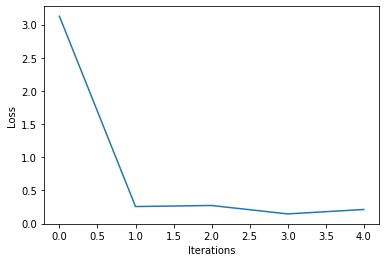

In [24]:
# You should be able to get a train accuracy of >90% and a test accuracy >85% 
# The settings below gave >95% train accuracy and >90% test accuracy 

# Feel free to adjust the values and explore how the network behaves
net_dims = [784, 100, 100, 64, 10] # This network has 4 layers
#784 is for image dimensions
#10 is for number of categories 
#100 and 64 are arbitrary

# list of dropout probabilities for each layer
# The length of the list is equal to the number of layers
# Note: Has to be same length as net_dims. 0 indicates no dropout
drop_prob_list = [0, 0, 0, 0]

# binary list indicating if batchnorm should be implemented for a layer
# The length of the list is equal to the number of layers
# 1 indicates bathnorm and 0 indicates no batchnorm
# If your implementation of batchnorm is incorrect, then set bnorm_list = [0,0,0,0]
bnorm_list = [1,1,1,1]
assert(len(bnorm_list) == len(net_dims)-1)

# list of strings indicating the activation for a layer
# The length of the list is equal to the number of layers
# The last layer is usually a linear before the softmax
act_list = ['relu', 'relu', 'relu', 'linear']
assert(len(act_list) == len(net_dims)-1)
    
# initialize learning rate, decay_rate and num_iterations 
num_epochs = 2  #3
batch_size = 128 #64
learning_rate = 1e-2
decay_rate = 1
apply_momentum = True

np.random.seed(1)

print("Network dimensions are:" + str(net_dims))
print('Dropout= [{}], Batch Size = {}, lr = {}, decay rate = {}'\
      .format(drop_prob_list,batch_size,learning_rate,decay_rate)) 

# getting the subset dataset from MNIST
trX, trY, tsX, tsY = get_mnist()
# We need to reshape the data everytime to match the format (d,m), where d is dimensions (784) and m is number of samples
trX = trX.reshape(-1, 28*28).T
trY = trY.reshape(1, -1)
tsX = tsX.reshape(-1, 28*28).T
tsY = tsY.reshape(1, -1)

costs, parameters = multi_layer_network(trX, trY, net_dims, act_list, drop_prob_list, bnorm_list, \
                                        num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate, \
                                        decay_rate=decay_rate, apply_momentum=apply_momentum, log=True)

# compute the accuracy for training set and testing set
train_Pred = classify(trX, parameters)

test_Pred = classify(tsX, parameters)

# Estimate the training accuracy 'trAcc' comparing train_Pred and trY 
# Estimate the testing accuracy 'teAcc' comparing test_Pred and tsY
# your code here
trAcc = (trY == train_Pred).mean()*100
teAcc = (tsY == test_Pred).mean() *100

print("Accuracy for training set is {0:0.3f} %".format(trAcc))
print("Accuracy for testing set is {0:0.3f} %".format(teAcc))

plt.plot(range(len(costs)),costs)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [25]:
# The following set up gives an accuracy of > 96% for both test and train. 
# Feel free to change the settings to get the best accuracy 
np.random.seed(1)

net_dims = [784, 100, 100, 10] 
drop_prob_list = [0, 0, 0]
act_list = ['relu', 'relu', 'linear']
    
# initialize learning rate, decay_rate and num_iterations 
num_epochs = 2 #3
batch_size = 128  #64
learning_rate = 1e-3
decay_rate = 0.1
apply_momentum = True

# If your implementation of batchnorm is incorrect, 
# then set bnorm_list = [0,0,0] below to run the following testcase without batchnorm. 
# The test case is still expected to pass without batchnorm when your accuracy is above 95%
bnorm_list = [1,1,1]

In [26]:
# getting the subset dataset from MNIST
trX, trY, tsX, tsY = get_mnist()
# We need to reshape the data everytime to match the format (d,m), where d is dimensions (784) and m is number of samples
trX = trX.reshape(-1, 28*28).T
trY = trY.reshape(1, -1)
tsX = tsX.reshape(-1, 28*28).T
tsY = tsY.reshape(1, -1)

costs, parameters = multi_layer_network(trX, trY, net_dims, act_list, drop_prob_list, bnorm_list, \
                                        num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate, \
                                        decay_rate=decay_rate, apply_momentum=apply_momentum, log=False)

# compute the accuracy for training set and testing set
train_Pred = classify(trX, parameters)
test_Pred = classify(tsX, parameters)

# Contains hidden tests 
# Should get atleast 95% train and test accuracy